# TensorFlow 2.0 Project - Predicting Loan Repayment
# Part I: The Data
### A. J. Zerouali 2021/09/02

* This is the project in Section 25 of Pierian Data's DSML course. It's covered (with solutions) in Lectures 143-151.
* I'll do this project from scratch.

## Introduction

Here's the description of the project. We'll be using two csv files: "lending_club_loan_two" modified from Kaggle, and "lending_club_info" 

### a) The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club. 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### b) Our Goal

Main question: **Given historical data on loans with information on whether or not the borrower defaulted (charge-off), can we build a model predicting wether or nor a borrower will repay their loan?**

This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model! Our label here is the **"loan_status"** column.

### c) Comments and notes

0) This notebook will deal with the data only. There are other notebooks that deal with the neural nets, and these use clean data from the present notebook.

1) I'm thinking of doing some hyperparameter optimization for the neural net of this project. The next line is from Google's HParams tutorial:

https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams.

I would like to avoid doing too much trial and error on my nets in general.

2) It would also be useful to paralellize the code. Here's the package to do this in Jupyter: https://ipyparallel.readthedocs.io/en/latest/. To use ipyparallel in Google Colab, have to install it using:
           
           !pip install ipyparallel
           
If I absolutely have to work with trial and error, might as well train several nets in parallel.

3) I might have to make models that don't include all categorical features.

4) (21/09/09) 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%load_ext tensorboard

**Remark:** The data set is much larger than the previous exercises: 95mb. There are 396k entries in it.

In [3]:
df_lnclb_data = pd.read_csv("lending_club_loan_two.csv")

In [4]:
df_lnclb_info = pd.read_csv("lending_club_info.csv")

* The second csv gives a description of the columns of our dataframe.

In [5]:
df_lnclb_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


## 1) Exploratory Data Analysis (Attempt 1)

In [5]:
df_lnclb_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [7]:
df_lnclb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df_lnclb_data.iloc[1]

loan_amnt                                                        8000.0
term                                                          36 months
int_rate                                                          11.99
installment                                                      265.68
grade                                                                 B
sub_grade                                                            B5
emp_title                                               Credit analyst 
emp_length                                                      4 years
home_ownership                                                 MORTGAGE
annual_inc                                                      65000.0
verification_status                                        Not Verified
issue_d                                                        Jan-2015
loan_status                                                  Fully Paid
purpose                                              debt_consol

### Features

### a) Basics

In [9]:
df_lnclb_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


There's a lot of features to take care of here, 28. Many of those are not numbers.
* Features we won't need (7): **emp_title**, **address** (not gonna work on zipcodes), **addr_state** (removed), **zip_code** (removed), **title**, **grade**, **sub_grade** (see appendix for why).
* Date features, which we'll drop (2): **issue_d** (loan month), **earliest_cr_line**.
* Categorical features (5): **home_ownership**, **verification_status**, **purpose** (of loan), **initial_list_status** (binary), **application_type**,
* Other (2): **term** (convert to int), **emp_length** (conv. to int, missing val's), 
* Integer features (4): **open_acc**, **pub_rec**, **total_acc**, **mort_acc**, **pub_rec_bankruptcies**.
* Float features (7): **int_rate**, **loan_amnt**, **annual_inc**, **dti**, **installment**, **revol_bal**, **revol_util**.
* **LABEL:** **loan_status** (binary, to be conv. to int.).

The 7 categorical features will have to be converted to integers.


### Target label:
We're interested in the **loan_status**

In [10]:
df_lnclb_data["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

Will also have to be converted to 0-1 values.

### Missing data (Prelim):
* Use the heatmap from Seaborn:

<AxesSubplot:>

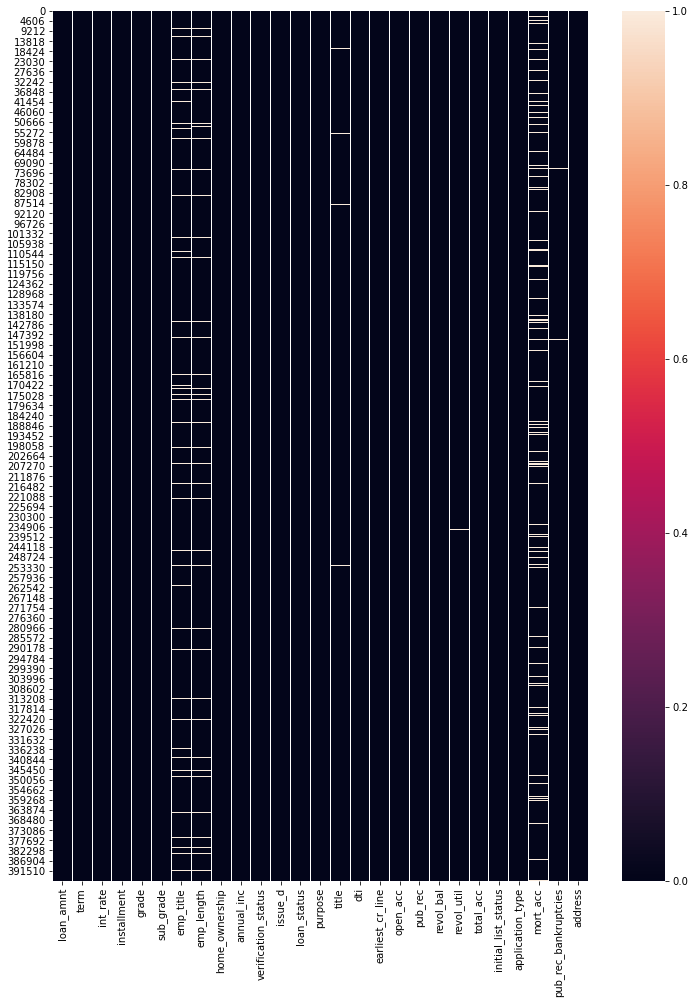

In [11]:
plt.figure(figsize=(12,16))
sns.heatmap(df_lnclb_data.isnull())


* Columns with missing data: **emp_title, emp_length, title, revol_uti, mort_acc** (emp_title and title will be dropped).
* I'll drop the employment title, but intuitively, the length of employment could be a useful feature for prediction.
* I think I'll impute the emp_length missing values with the average.
* mort_acc might be complicated to fix, as it would depend on other parameters.
* revol_util has one value missing. Could impute or just remove that line from the data.
* **WARNING:** This heatmap gives an idea of where data is missing but it's not accurate. For instance, there seems to be only one missing value in the revol_util column, but there are in fact 276 missing values:

In [12]:
len(df_lnclb_data[df_lnclb_data["revol_util"].isnull()])

276

### b) Feature engineering

The features that we'll modify are the following:
* Features that need conversion to ints: **term**, **emp_length**, **home_ownership**, **verification_status**, **purpose** (of loan), **initial_list_status** (binary), **application_type**, **loan_status** (the target)
* Features that need imputing: **emp_length**, **revol_util**

Let's start with conversions.


#### b.1 - Conversion functions

#### term

For this feature:

In [13]:
df_lnclb_data["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [14]:
len(df_lnclb_data[df_lnclb_data["term"].isnull()])

0

* No missing values.
* We'll add a feature term_int to the dataset, using:

In [15]:
def normalize_term(in_str):
    if (in_str==" 36 months"):
        return 36
    elif (in_str==" 60 months"):
        return 60

#### emp_length

The possible values for this feature are the following:

In [16]:
df_lnclb_data["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

There are missing values in this column:

In [17]:
len(df_lnclb_data[df_lnclb_data["emp_length"].isnull()])

18301

* We'll convert these values to integers, and for the missing values, we'll impute with a rounded average.
* I'll create a new column called **emp_length_int** for the data set.
* Here's the function we'll use:

In [18]:
def normalize_emp_length(in_str):
    if (in_str=="< 1 year"):
        return 0
    elif (in_str=="1 year"):
        return 1
    elif (in_str=="2 years"):
        return 2
    elif (in_str=="3 years"):
        return 3
    elif (in_str=="4 years"):
        return 4
    elif (in_str=="5 years"):
        return 5
    elif (in_str=="6 years"):
        return 6
    elif (in_str=="7 years"):
        return 7
    elif (in_str=="8 years"):
        return 8
    elif (in_str=="9 years"):
        return 9
    elif (in_str=="10+ years"):
        return 10

In [19]:
len(df_lnclb_data[df_lnclb_data["emp_length"]=="1 year"])

25882

In [20]:
len(df_lnclb_data[df_lnclb_data["emp_length"]=="10+ years"])

126041

#### home_ownership

Categorical feature with the following values:

In [21]:
df_lnclb_data["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [22]:
len(df_lnclb_data[df_lnclb_data["home_ownership"]=="RENT"])

159790

In [23]:
df_lnclb_data[df_lnclb_data["home_ownership"].isnull()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


* The MORTGAGE, RENT and OWN make sense. NONE is unclear, and it doesn't seem like it means homeless, but rather missing entry. ANY is also strange, so I'll merge NONE and ANY with OTHER. Good news: No missing data...
* If I think of those categories as scores in home_ownership_int, I'll use the following:
        - OTHER, NONE and ANY: home_ownership_int = 0
        - RENT: home_ownership_int = 1
        - MORTGAGE: home_ownership_int = 2
        - OWN: home_ownership_int = 3

In [24]:
df_lnclb_data[df_lnclb_data["home_ownership"]=="NONE"]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
9949,2800.0,36 months,8.70,88.65,B,B1,NaN,< 1 year,NONE,120000.0,...,6.0,0.0,8155.0,14.9,8.0,f,INDIVIDUAL,NaN,NaN,"49911 Hays Mountains\nSouth Tammyland, WI 22690"
48022,15000.0,36 months,12.12,499.08,B,B3,soundshore medical center,10+ years,NONE,98000.0,...,17.0,0.0,47206.0,44.4,35.0,f,INDIVIDUAL,0.0,0.0,"13128 Ortiz Cliffs\nHawkinsstad, OR 30723"
54698,30000.0,60 months,22.95,844.86,F,F1,Mount Sinai School of Medicine,< 1 year,NONE,105000.0,...,20.0,0.0,12083.0,37.7,37.0,f,INDIVIDUAL,0.0,0.0,"61466 Brennan Lake Suite 087\nAustinton, IL 48052"
66859,5700.0,36 months,14.09,195.07,B,B5,american airlines,10+ years,NONE,51500.0,...,13.0,0.0,11582.0,34.2,17.0,f,INDIVIDUAL,1.0,0.0,"707 Gilmore Avenue Suite 887\nAshleyland, MN 7..."
71826,25000.0,60 months,24.89,732.18,G,G3,Newmont Mining Co.,10+ years,NONE,80000.0,...,9.0,0.0,19192.0,95.0,21.0,f,INDIVIDUAL,3.0,0.0,"3457 Christine Terrace\nFieldston, WA 22690"
84015,15500.0,36 months,19.05,568.57,D,D4,Wells Fargo,10+ years,NONE,80000.0,...,12.0,0.0,11654.0,93.9,23.0,f,INDIVIDUAL,3.0,0.0,USNS Lindsey\nFPO AE 29597
89376,11000.0,36 months,14.33,377.72,C,C1,Landscaping plus of Eden valley,10+ years,NONE,38000.0,...,12.0,0.0,5732.0,25.4,30.0,f,INDIVIDUAL,1.0,0.0,"630 Katherine Keys Suite 432\nJasonberg, AZ 00813"
99298,16750.0,60 months,15.31,401.22,C,C2,Target distribution center,8 years,NONE,38000.0,...,8.0,0.0,16404.0,32.4,19.0,f,INDIVIDUAL,7.0,0.0,16971 Eric Mountains Suite 682\nNorth Yolandav...
113330,10000.0,36 months,7.75,312.22,A,A3,ups,5 years,NONE,22200.0,...,9.0,0.0,4767.0,8.7,22.0,f,INDIVIDUAL,NaN,NaN,"70453 Miller Causeway Suite 497\nNicoleburgh, ..."
131506,3825.0,36 months,14.09,130.90,B,B5,Seldens Home Furnishings,1 year,NONE,45000.0,...,10.0,0.0,21351.0,62.8,19.0,w,INDIVIDUAL,2.0,0.0,"0347 Evan Corners Suite 662\nDiazmouth, ME 00813"


Conversion function:

In [25]:
def normalize_home_ownership(in_str):
    if (in_str == "NONE") or (in_str == "ANY") or (in_str == "OTHER"):
        return 0
    elif (in_str == "RENT"):
        return 1
    elif (in_str == "MORTGAGE"):
        return 2
    elif (in_str == "OWN"):
        return 3

#### verification_status

Categorical feature with the following values:

In [26]:
df_lnclb_data["verification_status"].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [27]:
len(df_lnclb_data[df_lnclb_data["verification_status"].isnull()])

0

* Same as above. We'll create the new feature verification_status_int by means of:

In [28]:
def normalize_verification_status(in_str):
    if (in_str == "Not Verified"):
        return 0
    elif (in_str == "Source Verified"):
        return 1
    elif (in_str == "Verified"):
        return 2

#### purpose

Here:

In [29]:
df_lnclb_data["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [30]:
df_lnclb_data["purpose"].iloc[10]

'debt_consolidation'

In [31]:
df_lnclb_data[df_lnclb_data["purpose"]=="debt_consolidation"]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"
10,10000.0,36 months,13.11,337.47,B,B4,Sodexo,2 years,RENT,95000.0,...,5.0,1.0,4702.0,64.4,26.0,f,INDIVIDUAL,4.0,1.0,"40245 Cody Drives\nBartlettfort, NM 00813"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [32]:
len(df_lnclb_data[df_lnclb_data["purpose"].isnull()])

0

* There are 15 categories here. I would normally group them by how risky they are. For training purposes however, I think it's better to just assign 15 integers

In [33]:
def normalize_purpose(in_str):
    if (in_str=="debt_consolidation"):
        return 0
    elif (in_str=="credit_card"):
        return 1
    elif (in_str=="home_improvement"):
        return 2
    elif (in_str=="other"):
        return 3
    elif (in_str=="major_purchase"):
        return 4
    elif (in_str=="small_business"):
        return 5
    elif (in_str=="car"):
        return 6
    elif (in_str=="medical"):
        return 7
    elif (in_str=="moving"):
        return 8
    elif (in_str=="vacation"):
        return 9
    elif (in_str=="house"):
        return 10
    elif (in_str=="wedding"):
        return 11
    elif (in_str=="renewable_energy"):
        return 12
    elif (in_str=="educational"):
        return 13

#### initial_list_status

Here:

In [34]:
df_lnclb_data["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [35]:
len(df_lnclb_data[df_lnclb_data["initial_list_status"].isnull()])

0

In [36]:
def normalize_initial_list_status(in_str):
    if (in_str == "f"):
        return 0
    elif (in_str == "w"):
        return 1

#### application_type

value counts:

In [37]:
df_lnclb_data["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [38]:
len(df_lnclb_data[df_lnclb_data["application_type"].isnull()])

0

In [39]:
def normalize_application_type(in_str):
    if (in_str == "INDIVIDUAL"):
        return 0
    elif (in_str == "JOINT"):
        return 1
    elif (in_str == "DIRECT_PAY"):
        return 2

#### loan_status

I'll also replace the target feature with *loan_status_int*

In [40]:
df_lnclb_data["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [41]:
len(df_lnclb_data[df_lnclb_data["initial_list_status"].isnull()])

0

In [42]:
df_lnclb_data["loan_status"].head().iloc[4]

'Charged Off'

In [43]:
def normalize_loan_status(in_str):
    if (in_str == "Charged Off"):
        return 0
    elif (in_str == "Fully Paid"):
        return 1

#### b.2 - Conversion of categorical features to int's

* Drop the features we won't need:

In [44]:
df_lnclb_data = df_lnclb_data.drop(labels = ["grade", "sub_grade", "emp_title", "title", "address", \
                       "issue_d", "earliest_cr_line"], axis = 1)

df_lnclb_data.tail()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
396025,10000.0,60 months,10.99,217.38,2 years,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36 months,12.29,700.42,5 years,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36 months,9.99,161.32,10+ years,RENT,56500.0,Verified,Fully Paid,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0
396028,21000.0,60 months,15.31,503.02,10+ years,MORTGAGE,64000.0,Verified,Fully Paid,debt_consolidation,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0
396029,2000.0,36 months,13.61,67.98,10+ years,RENT,42996.0,Verified,Fully Paid,debt_consolidation,8.32,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0



* For each of: **term**, **emp_length**, **home_ownership**, **verification_status**, **purpose** (of loan), **initial_list_status** (binary), **application_type**, **loan_status** (the target)
        - Create new column 
        - Apply normalizing function
        - Remove categorical data

In [45]:
#### APPLY NORMALIZING FUNCTIONS ####
# loan_status
df_lnclb_data["loan_status_int"] = df_lnclb_data["loan_status"].apply(normalize_loan_status)
# term
df_lnclb_data["term_int"] = df_lnclb_data["term"].apply(normalize_term)
# home_ownership
df_lnclb_data["home_ownership_int"] = df_lnclb_data["home_ownership"].apply(normalize_home_ownership)
# verification_status
df_lnclb_data["verification_status_int"] = df_lnclb_data["verification_status"].apply(normalize_verification_status)
# purpose
df_lnclb_data["purpose_int"] = df_lnclb_data["purpose"].apply(normalize_purpose)
# initial_list_status
df_lnclb_data["initial_list_status_int"] = df_lnclb_data["initial_list_status"].apply(normalize_initial_list_status)
# application_type
df_lnclb_data["application_type_int"] = df_lnclb_data["application_type"].apply(normalize_application_type)
# emp_length
df_lnclb_data["emp_length_int"] = df_lnclb_data["emp_length"].apply(normalize_emp_length)

#### IMPUTE emp_length ####
# Get average
emp_len_avg = np.round_(df_lnclb_data[df_lnclb_data["emp_length_int"].isnull()==False]["emp_length_int"].mean())
# Fill NaN entries
df_lnclb_data["emp_length_int"] = df_lnclb_data["emp_length_int"].fillna(value = emp_len_avg)

#### DROP CATEGORICAL FEATURES ####
df_lnclb_data = df_lnclb_data.drop( labels = ["loan_status", "term", "home_ownership", "verification_status", \
                                            "purpose", "initial_list_status", "application_type", "emp_length"], axis = 1)

### c) Missing values




<AxesSubplot:>

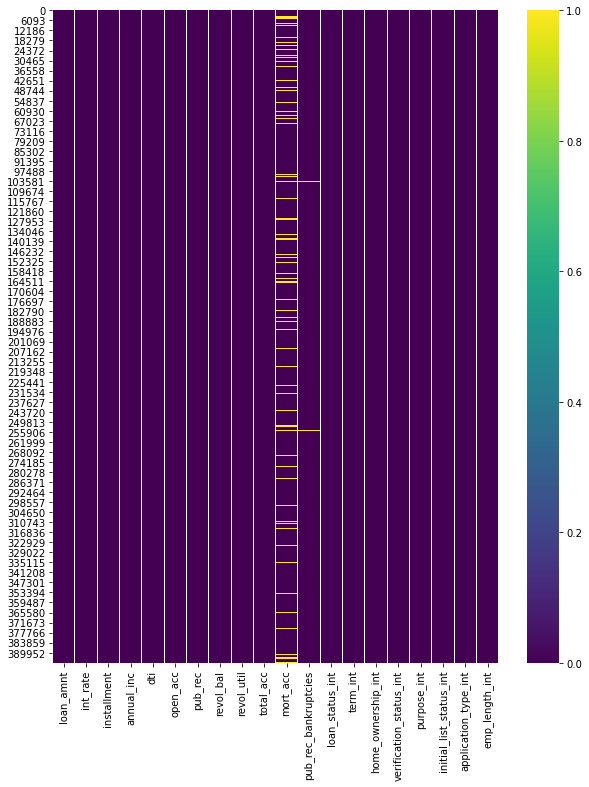

In [55]:
plt.figure(figsize= (10,12))
sns.heatmap(df_lnclb_data.isnull(), cmap = "viridis")

* We now have the following list of features with missing values:

In [63]:
for i in df_lnclb_data.columns:
    no_nan = len(df_lnclb_data[df_lnclb_data[i].isnull()])
    if (no_nan >0):
        print(f"There are {no_nan} values missing from column {i}")

There are 276 values missing from column revol_util
There are 37795 values missing from column mort_acc
There are 535 values missing from column pub_rec_bankruptcies


#### revol_util

* I think it's OK to impute this one to the average too.

* Average of revol_util

In [74]:
avg_revol_util = df_lnclb_data["revol_util"].mean()

* Impute:

In [75]:
df_lnclb_data["revol_util"] = df_lnclb_data["revol_util"].fillna(value = avg_revol_util)

In [76]:
len(df_lnclb_data[df_lnclb_data["revol_util"].isnull()])

0

In [77]:
df_lnclb_data["revol_util"]

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

#### mort_acc

* It doesn't seem sensible to discard these entries. They represent 9.5% of the data set.
* I think the best way of treating the values here is to look at other features to which mort_acc is correlated. In fact mort_acc is most correlated to total_acc.
* To fill the missing mort_acc values, we'll first group by the total_acc feature and the averages for each group. This will give us a dataframe with total_acc values as indices and the corresponding average number of mortgages in mort_acc. We'll have to write another function to pass in .apply(), and we'll have to round the averages.

In [64]:
df_lnclb_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status_int', 'term_int',
       'home_ownership_int', 'verification_status_int', 'purpose_int',
       'initial_list_status_int', 'application_type_int', 'emp_length_int'],
      dtype='object')

In [164]:
df_temp_miss = df_lnclb_data[["pub_rec_bankruptcies", "application_type_int","total_acc", "home_ownership_int", "mort_acc"]]
df_temp_miss

,pub_rec_bankruptcies,application_type_int,total_acc,home_ownership_int,mort_acc
0,0.0,0,25.0,1,0.0
1,0.0,0,27.0,2,3.0
2,0.0,0,26.0,1,0.0
3,0.0,0,13.0,1,0.0
4,0.0,0,43.0,2,1.0
...,...,...,...,...,...
396025,0.0,0,23.0,1,0.0
396026,0.0,0,8.0,2,1.0
396027,0.0,0,23.0,1,0.0
396028,0.0,0,20.0,2,5.0


In [165]:
df_temp_miss.corr()

,pub_rec_bankruptcies,application_type_int,total_acc,home_ownership_int,mort_acc
pub_rec_bankruptcies,1.000000,0.002581,0.042229,-0.005287,0.027667
application_type_int,0.002581,1.000000,0.010729,0.004794,-0.005065
total_acc,0.042229,0.010729,1.000000,0.161062,0.381191
home_ownership_int,-0.005287,0.004794,0.161062,1.000000,0.314011
mort_acc,0.027667,-0.005065,0.381191,0.314011,1.000000


* It looks like the mort_acc is heavily correlated with the number of total accounts (total_acc) and the home ownership.

In [70]:
df_temp_miss["total_acc"].value_counts()

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
103.0        1
100.0        1
117.0        1
151.0        1
129.0        1
Name: total_acc, Length: 118, dtype: int64

In [71]:
df_temp_miss["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [72]:
df_temp_miss[df_temp_miss["mort_acc"].isnull()]["total_acc"].value_counts()

17.0    1437
16.0    1427
15.0    1424
21.0    1386
13.0    1367
        ... 
90.0       1
68.0       1
71.0       1
80.0       1
87.0       1
Name: total_acc, Length: 79, dtype: int64

In [97]:
help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.frame:

groupby(self, by=None, axis=0, level=None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, squeeze: 'bool' = <object object at 0x00000145202BC590>, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy'
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If a

* Apply groupby and take .mean():

In [166]:
df_mort_acc_avg = df_temp_miss[["total_acc", "mort_acc"]].groupby("total_acc").mean()

In [167]:
df_mort_acc_avg

,mort_acc
total_acc,
2.0,0.000000
3.0,0.050847
4.0,0.065389
5.0,0.102480
6.0,0.150128
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [168]:
df_mort_acc_avg["mort_acc"] = df_mort_acc_avg["mort_acc"].apply(np.round_)

In [169]:
df_mort_acc_avg

,mort_acc
total_acc,
2.0,0.0
3.0,0.0
4.0,0.0
5.0,0.0
6.0,0.0
...,...
124.0,1.0
129.0,1.0
135.0,3.0


In [175]:
df_mort_acc_avg.loc[7.0]["mort_acc"]

0.0

In [113]:
len(df_temp_miss)

396030

In [170]:
len(df_temp_miss[df_temp_miss["mort_acc"].isnull()])

37260

* Here's our imputation function. Note how we have 2 arguments this time, and note we're using np.isnan as a condition. We'll apply this row-by-row with axis =1.

In [176]:
def imp_mort_acc(total_acc_col, mort_acc_col):
    if (np.isnan(mort_acc_col) == True):
        return df_mort_acc_avg.loc[total_acc_col]['mort_acc']
    else:
        return mort_acc_col

In [177]:
df_temp_miss["mort_acc_1"] = df_temp_miss.apply(lambda x: imp_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

<ipython-input-177-c03ade82e8e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_miss["mort_acc_1"] = df_temp_miss.apply(lambda x: imp_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)


In [181]:
len(df_temp_miss[df_temp_miss["mort_acc"].isnull()])

37260

In [182]:
df_temp_miss

,pub_rec_bankruptcies,application_type_int,total_acc,home_ownership_int,mort_acc,mort_acc_1
0,0.0,0,25.0,1,0.0,0.0
1,0.0,0,27.0,2,3.0,3.0
2,0.0,0,26.0,1,0.0,0.0
3,0.0,0,13.0,1,0.0,0.0
4,0.0,0,43.0,2,1.0,1.0
...,...,...,...,...,...,...
396025,0.0,0,23.0,1,0.0,0.0
396026,0.0,0,8.0,2,1.0,1.0
396027,0.0,0,23.0,1,0.0,0.0
396028,0.0,0,20.0,2,5.0,5.0


In [183]:
df_temp_miss = df_temp_miss.drop(labels = ["mort_acc"], axis =1 )
df_temp_miss

,pub_rec_bankruptcies,application_type_int,total_acc,home_ownership_int,mort_acc_1
0,0.0,0,25.0,1,0.0
1,0.0,0,27.0,2,3.0
2,0.0,0,26.0,1,0.0
3,0.0,0,13.0,1,0.0
4,0.0,0,43.0,2,1.0
...,...,...,...,...,...
396025,0.0,0,23.0,1,0.0
396026,0.0,0,8.0,2,1.0
396027,0.0,0,23.0,1,0.0
396028,0.0,0,20.0,2,5.0


In [184]:
df_temp_miss = df_temp_miss.rename(columns = {"mort_acc_1":"mort_acc"})
df_temp_miss

,pub_rec_bankruptcies,application_type_int,total_acc,home_ownership_int,mort_acc
0,0.0,0,25.0,1,0.0
1,0.0,0,27.0,2,3.0
2,0.0,0,26.0,1,0.0
3,0.0,0,13.0,1,0.0
4,0.0,0,43.0,2,1.0
...,...,...,...,...,...
396025,0.0,0,23.0,1,0.0
396026,0.0,0,8.0,2,1.0
396027,0.0,0,23.0,1,0.0
396028,0.0,0,20.0,2,5.0


In [185]:
df_lnclb_data["mort_acc"] = df_temp_miss["mort_acc"]

#### pub_rec_bankruptcies

This one has a 0.7 correlation with the number of derogatory public records.

In [80]:
df_lnclb_data[["int_rate", "pub_rec", "pub_rec_bankruptcies"]].corr()

,int_rate,pub_rec,pub_rec_bankruptcies
int_rate,1.000000,0.060986,0.057450
pub_rec,0.060986,1.000000,0.699408
pub_rec_bankruptcies,0.057450,0.699408,1.000000


In [81]:
df_lnclb_data["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [82]:
df_lnclb_data["pub_rec"].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
15.0         1
40.0         1
86.0         1
17.0         1
24.0         1
Name: pub_rec, dtype: int64

* It looks like most missing pub_rec_bankruptcies are 0:

In [84]:
df_lnclb_data[df_lnclb_data["pub_rec_bankruptcies"].isnull()]["pub_rec"].value_counts()

0.0    517
1.0     17
2.0      1
Name: pub_rec, dtype: int64

* Setting all these to 0 wouldn't have any statistical impact (at worst, adding 0.004\% mistakes).

In [92]:
df_lnclb_data[df_lnclb_data["pub_rec_bankruptcies"].isnull()] = df_lnclb_data[df_lnclb_data["pub_rec_bankruptcies"].isnull()].fillna(0)

In [186]:
for i in df_lnclb_data.columns:
    no_nan = len(df_lnclb_data[df_lnclb_data[i].isnull()])
    if (no_nan >0):
        print(f"There are {no_nan} values missing from column {i}")

### SAVE ###

Converting everything to int's reduces the disk space of the data by 63%. Resulting file is 35mb.

In [187]:
df_lnclb_data.to_csv("lenders_club_data_clean_AJZer.csv")

<AxesSubplot:>

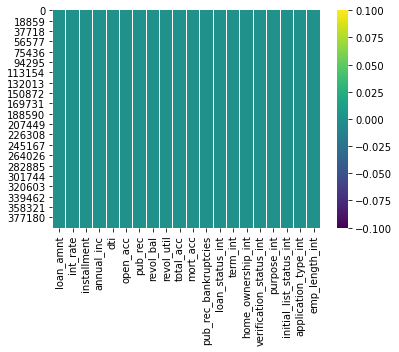

In [188]:
sns.heatmap(df_lnclb_data.isnull(), cmap="viridis")

## 2) Exploratory data analysis (Attempt 2)

**REMARK:** Everything in this section should be executed **after** making the imports and loading *df_lnclb_data* and *df_lnclb_info*.

Here we'll do most of what we did above:

- We'll drop irrelevant features.
    
- We'll treat the missing data as before.
    
- Instead of converting non-binary categorical to integer codes, we'll use dummy labels (.getdummies()).

### a) Irrelevant features and missing data

* Drop the features:

In [6]:
df_lnclb_data = df_lnclb_data.drop(labels = ["grade", "sub_grade", "emp_title", "title", "address", \
                       "issue_d", "earliest_cr_line"], axis = 1)

df_lnclb_data.tail()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
396025,10000.0,60 months,10.99,217.38,2 years,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36 months,12.29,700.42,5 years,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36 months,9.99,161.32,10+ years,RENT,56500.0,Verified,Fully Paid,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0
396028,21000.0,60 months,15.31,503.02,10+ years,MORTGAGE,64000.0,Verified,Fully Paid,debt_consolidation,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0
396029,2000.0,36 months,13.61,67.98,10+ years,RENT,42996.0,Verified,Fully Paid,debt_consolidation,8.32,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0


In [7]:
df_lnclb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            395754 non-null  float64
 15  

* Next, we fill the missing **mort_acc** info:

* Apply groupby and take .mean():

In [8]:
df_mort_acc_avg = df_lnclb_data[["total_acc", "mort_acc"]].groupby("total_acc").mean().apply(np.round_)

In [9]:
df_mort_acc_avg

,mort_acc
total_acc,
2.0,0.0
3.0,0.0
4.0,0.0
5.0,0.0
6.0,0.0
...,...
124.0,1.0
129.0,1.0
135.0,3.0


* Here's our imputation function. Note how we have 2 arguments this time, and note we're using np.isnan as a condition. We'll apply this row-by-row with axis =1.

In [10]:
def imp_mort_acc(total_acc_col, mort_acc_col):
    if (np.isnan(mort_acc_col) == True):
        return df_mort_acc_avg.loc[total_acc_col]['mort_acc']
    else:
        return mort_acc_col

In [11]:
df_mort_acc_avg.loc[135.0]["mort_acc"]

3.0

In [12]:
df_lnclb_data["mort_acc_1"] = df_lnclb_data.apply(lambda x: imp_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [13]:
len(df_lnclb_data[df_lnclb_data["mort_acc"].isnull()])

37795

In [14]:
len(df_lnclb_data[df_lnclb_data["mort_acc_1"].isnull()])

0

In [15]:
df_lnclb_data = df_lnclb_data.drop(labels = ["mort_acc"], axis =1 )
df_lnclb_data = df_lnclb_data.rename(columns = {"mort_acc_1":"mort_acc"})

In [16]:
df_lnclb_data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,mort_acc
0,10000.0,36 months,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,0.0,3.0
2,15600.0,36 months,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,0.0,1.0


In [17]:
for i in df_lnclb_data.columns:
    no_nan = len(df_lnclb_data[df_lnclb_data[i].isnull()])
    if (no_nan >0):
        print(f"There are {no_nan} values missing from column {i}")
        

There are 18301 values missing from column emp_length
There are 276 values missing from column revol_util
There are 535 values missing from column pub_rec_bankruptcies


* Portilla makes the case in his solutions that one can drop the *emp_length* column. Let's look at the correlation between employment length and whether or not a loan has been repaid.
* Start by converting to ints with normalize_emp_length and normalize_loan_status

In [18]:
def normalize_emp_length(in_str):
    if (in_str=="< 1 year"):
        return 0
    elif (in_str=="1 year"):
        return 1
    elif (in_str=="2 years"):
        return 2
    elif (in_str=="3 years"):
        return 3
    elif (in_str=="4 years"):
        return 4
    elif (in_str=="5 years"):
        return 5
    elif (in_str=="6 years"):
        return 6
    elif (in_str=="7 years"):
        return 7
    elif (in_str=="8 years"):
        return 8
    elif (in_str=="9 years"):
        return 9
    elif (in_str=="10+ years"):
        return 10

In [19]:
def normalize_loan_status(in_str):
    if (in_str == "Charged Off"):
        return 0
    elif (in_str == "Fully Paid"):
        return 1

In [20]:
df_lnclb_data["loan_status_int"]=df_lnclb_data["loan_status"].apply(normalize_loan_status)

In [21]:
temp_emp_length_int = df_lnclb_data["emp_length"].apply(normalize_emp_length)

* Now we have the following correlation:

In [22]:
df_lnclb_data["loan_status_int"].corr(other = temp_emp_length_int)

0.01373423478049632

* Indeed the correlation is very low, so we drop the *emp_length* column.

In [23]:
df_lnclb_data = df_lnclb_data.drop(labels = "emp_length", axis =1)

* This time, we'll drop the rows that are missing *revol_util* and *pub_rec_bankruptcies*:

In [24]:
df_lnclb_data = df_lnclb_data.dropna()

In [25]:
df_lnclb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   verification_status   395219 non-null  object 
 7   loan_status           395219 non-null  object 
 8   purpose               395219 non-null  object 
 9   dti                   395219 non-null  float64
 10  open_acc              395219 non-null  float64
 11  pub_rec               395219 non-null  float64
 12  revol_bal             395219 non-null  float64
 13  revol_util            395219 non-null  float64
 14  total_acc             395219 non-null  float64
 15  

### b) Categorical features

* We'll start by converting the *term* feature into integers


In [26]:
df_lnclb_data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [27]:
df_lnclb_data['term']=df_lnclb_data['term'].replace(" 36 months", 36)
df_lnclb_data['term']=df_lnclb_data['term'].replace(" 60 months", 60)

In [28]:
df_lnclb_data['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

* We have the following categorical features: **verification_status**, **purpose**, **initial_list_status** and **application_type** which we can simply convert to dummies

In [29]:
df_dummies_A = pd.get_dummies(df_lnclb_data[['verification_status', 'application_type',\
                                             'initial_list_status','purpose']], drop_first = True)
df_lnclb_data = df_lnclb_data.drop(labels = ['verification_status', 'application_type',\
                                             'initial_list_status','purpose'], axis =1 )
df_lnclb_data = pd.concat([df_lnclb_data, df_dummies_A], axis =1)

In [30]:
df_lnclb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   home_ownership                       395219 non-null  object 
 5   annual_inc                           395219 non-null  float64
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

* It now remains to fix the home ownership. Again, we'll merge the "NONE", "ANY" and "OTHER" values (I didn't know I could do that more easily):

In [31]:
df_lnclb_data['home_ownership']=df_lnclb_data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

* Now get the dummies for *home_ownership* one and do the same as for the other categorical features

In [32]:
df_dummies_B = pd.get_dummies(df_lnclb_data["home_ownership"], drop_first = True)
df_lnclb_data = pd.concat([df_lnclb_data, df_dummies_B], axis =1)
df_lnclb_data = df_lnclb_data.drop(labels = "home_ownership", axis =1 )

In [33]:
df_lnclb_data["loan_repaid"] = pd.get_dummies(df_lnclb_data["loan_status"], drop_first= True)

In [34]:
df_lnclb_data = df_lnclb_data.drop(labels = ["loan_status", "loan_status_int"], axis = 1)

In [35]:
df_lnclb_data = df_lnclb_data.rename(columns = {"loan_repaid":"loan_status_int"})

In [47]:
df_lnclb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  pub_rec_bankr

* Now we save the file

In [48]:
df_lnclb_data.to_csv("lenders_club_data_clean_35feat_210909_AJZer.csv")

## Appendix

### More on data

In [38]:
'''
### 'verification_status', 'application_type','initial_list_status','purpose' ###

dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership ###

df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

'''

"\n### 'verification_status', 'application_type','initial_list_status','purpose' ###\n\ndummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)\ndf = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)\ndf = pd.concat([df,dummies],axis=1)\n\n### home_ownership ###\n\ndf['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')\n\ndummies = pd.get_dummies(df['home_ownership'],drop_first=True)\ndf = df.drop('home_ownership',axis=1)\ndf = pd.concat([df,dummies],axis=1)\n\n"

#### grade and sub_grade

*grade* has 7 possible values A to G; *sub_grade* has 5 values for each letter:

In [39]:
#print(f"len(df_lnclb_data[\"grade\"].value_counts())={len(df_lnclb_data['grade'].value_counts())}")
#df_lnclb_data["grade"].value_counts()


In [40]:
#print(f"len(df_lnclb_data[\"sub_grade\"].value_counts())={len(df_lnclb_data['sub_grade'].value_counts())}")
#df_lnclb_data["sub_grade"].value_counts()

* Looking here https://www.lendingclub.com/foliofn/rateDetail.action, it seems like the grade and subgrade determine the interest rate of the loan:

In [41]:
#df_lnclb_data[df_lnclb_data["sub_grade"]=="A1"]

In [42]:
#df_lnclb_data[df_lnclb_data["sub_grade"]=="G5"]

* We'll therefore drop these 2 features, since the interest rate is a finer feature than those 2 combined.

### Testing normalizing maps

* Features we'll remove (7): **emp_title**, **address**, **title**, **grade**, **sub_grade**, **issue_d**, **earliest_cr_line**.

I'll start by manipulating a backup (eats up another 100mb of RAM):

In [43]:
#df_temp = pd.read_csv("lending_club_loan_two.csv")

In [44]:
#df_temp.columns

In [45]:
#len(df_temp.columns)

In [46]:
#df_temp = df_temp.drop(labels = ["grade", "sub_grade", "emp_title", "title", "address", \
                       "issue_d", "earliest_cr_line"], axis = 1)

IndentationError: unexpected indent (<ipython-input-46-5616540e2933>, line 2)

In [ ]:
#help(pd.DataFrame.apply)

In [ ]:
#help(pd.DataFrame.applymap)

#### normalize_loan_status

In [ ]:
#df_temp["loan_status_int"] = df_temp["loan_status"].apply(normalize_loan_status)

In [ ]:
#df_temp.head()

In [ ]:
#df_temp = df_temp.drop(labels = ["loan_status"], axis = 1)

In [ ]:
#df_temp.tail()

#### normalize_term

In [ ]:
#df_temp["term_int"] = df_temp["term"].apply(normalize_term)

In [ ]:
#df_temp = df_temp.drop(labels = ["term"], axis =1 )

In [ ]:
#df_temp.head()

#### normalize_emp_length

In [ ]:
#df_temp["emp_length_int"] = df_temp["emp_length"].apply(normalize_emp_length)

In [ ]:
#df_temp[["emp_length", "emp_length_int"]].head()

In [ ]:
#df_temp = df_temp.drop(labels = ["emp_length"], axis =1 )

In [ ]:
#df_temp

In [ ]:
#df_temp[df_temp["emp_length_int"].isnull()]["emp_length_int"]

In [ ]:
#np.round_(df_temp[df_temp["emp_length_int"].isnull()== False]["emp_length_int"].mean())

* Impute to average:

In [ ]:
#emp_len_avg = np.round_(df_temp[df_temp["emp_length_int"].isnull()== False]["emp_length_int"].mean())

In [ ]:
#emp_len_avg

In [ ]:
#help(pd.DataFrame.fillna)

In [ ]:
#df_temp["emp_length_int"] = df_temp["emp_length_int"].fillna(value = emp_len_avg)

In [ ]:
#df_temp[df_temp["emp_length_int"].isnull()]

In [ ]:
#df_temp["emp_length_int"].iloc[35]

#### normalize_home_ownership

In [ ]:
#df_temp["home_ownership_int"] = df_temp["home_ownership"].apply(normalize_home_ownership)

In [ ]:
#df_temp[["home_ownership", "home_ownership_int"]]

In [ ]:
#df_temp[df_temp["home_ownership"]== "OWN"]["home_ownership_int"]

In [ ]:
#df_temp = df_temp.drop(labels = ["home_ownership"], axis =1 )

#### normalize_verification_status

In [ ]:
#df_temp["verification_status_int"] = df_temp["verification_status"].apply(normalize_verification_status)

In [ ]:
#df_temp[["verification_status", "verification_status_int"]].head()

In [ ]:
#df_temp = df_temp.drop(labels = "verification_status", axis = 1)

In [ ]:
#df_temp

#### normalize_purpose

In [ ]:
#df_temp["purpose_int"] = df_temp["purpose"].apply(normalize_purpose)

In [ ]:
#df_temp[df_temp["purpose"]=="medical"][["purpose", "purpose_int"]]

In [ ]:
#df_temp = df_temp.drop(labels = "purpose", axis =1)

#### normalize_initial_list_status

In [ ]:
#df_temp["initial_list_status_int"] = df_temp["initial_list_status"].apply(normalize_initial_list_status)

In [ ]:
#df_temp[["initial_list_status", "initial_list_status_int"]].head()

In [ ]:
#df_temp = df_temp.drop(labels = "initial_list_status", axis =1)

#### normalize_application_type

In [ ]:
#df_temp["application_type_int"] = df_temp["application_type"].apply(normalize_application_type)

In [ ]:
#df_temp[["application_type", "application_type_int"]]

In [ ]:
#df_temp[df_temp["application_type"]!="INDIVIDUAL"][["application_type", "application_type_int"]]

In [ ]:
#df_temp = df_temp.drop(labels = "application_type", axis =1)

### Scrap

#### Applying normalize_term

In [ ]:
#df_temp_1 = df_temp[["emp_length","int_rate","term"]]

In [ ]:
#df_temp_1.head()

In [ ]:
#df_temp_1["term"].iloc[4]

In [ ]:
#series_term_new  = df_temp_1["term"].apply(normalize_term)

In [ ]:
#series_term_new